In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

In [2]:
df = pd.read_csv('./archive/IRIS.csv')


In [3]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.shape

(150, 5)

In [7]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot: >

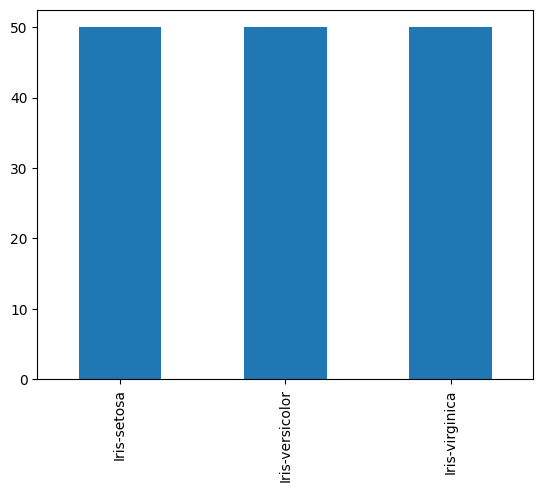

In [8]:
df['species'].value_counts().plot.bar()

In [9]:
# checking info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['species'] = df['species'].map({'Iris-setosa':0 , 'Iris-versicolor':1 ,'Iris-virginica':2}).astype(int)


In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
## spliting data 


In [14]:
X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
len(X_train) , len(y_train)

(100, 100)

In [21]:
### Model development 

from sklearn.naive_bayes import MultinomialNB

In [22]:
reg = MultinomialNB()

In [23]:
reg.fit(X_train , y_train)

MultinomialNB()

### checking validation report for train and test 

In [24]:
y_train_pred = reg.predict(X_train)


In [25]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [26]:
accuracy_score(y_train,y_train_pred)

0.97

In [27]:
confusion_matrix(y_train,y_train_pred)

array([[31,  0,  0],
       [ 0, 34,  1],
       [ 0,  2, 32]], dtype=int64)

In [ ]:
print(classification_report(y_train,y_train_pred))

## test performances 

In [29]:
y_test_pred = reg.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [31]:
accuracy_score(y_test,y_test_pred)

0.96

In [32]:
confusion_matrix(y_test,y_test_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 14]], dtype=int64)

In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      1.00      0.94        15
           2       1.00      0.88      0.93        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## checking with real data 

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
sol = reg.predict([[12.2 , 45.7 , 33.4 , 11.9]])  # customer 1
sol = sol[0]
if sol == 0:
    print('Setosa Flower')
elif sol == 1:
    print('Versica Flower')
else:
    print('Verginica Flower')

Versica Flower


In [37]:
sol = reg.predict([[1.2 , 2.4 , 5.6 , 8.7]])  # customer 2
sol = sol[0]
if sol == 0:
    print('Setosa Flower')
elif sol == 1:
    print('Versica Flower')
else:
    print('Verginica Flower')

Verginica Flower


## Logistic Regression 

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
lr.fit(X_train , y_train)

LogisticRegression()

In [42]:
## Training Accuracy

In [43]:
y_train_pred1 = lr.predict(X_train)


In [44]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [45]:
accuracy_score(y_train,y_train_pred1)

0.96

In [46]:
confusion_matrix(y_train,y_train_pred1)

array([[31,  0,  0],
       [ 0, 32,  3],
       [ 0,  1, 33]], dtype=int64)

In [47]:
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.91      0.94        35
           2       0.92      0.97      0.94        34

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [48]:
### Test data 

In [49]:
y_test_pred1 = lr.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [52]:
accuracy_score(y_test,y_test_pred1)

1.0

In [55]:
confusion_matrix(y_test,y_test_pred1)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]], dtype=int64)

In [56]:
print(classification_report(y_test,y_test_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## checking with real data 

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
sol = lr.predict([[12.2 , 45.7 , 33.4 , 11.9]])  # customer 1
sol = sol[0]
if sol == 0:
    print('Setosa Flower')
elif sol == 1:
    print('Versica Flower')
else:
    print('Verginica Flower')

Verginica Flower


In [60]:
sol = lr.predict([[1.2 , 2.4 , 5.6 , 8.7]])  # customer 2
sol = sol[0]
if sol == 0:
    print('Setosa Flower')
elif sol == 1:
    print('Versica Flower')
else:
    print('Verginica Flower')

Verginica Flower
